In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from   tensorflow.keras.layers import Conv2D, Input, Dense, Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model

In [3]:
cifar100=tf.keras.datasets.cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_train,y_test=y_train.flatten(),y_test.flatten()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape: ",x_train.shape)
print("y_train: ",y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train:  (50000,)


In [4]:
k=(len(set(y_train)))
print("number of classes:",k)

number of classes: 100


In [5]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 26s 15ms/step - loss: 3.7722 - accuracy: 0.1327 - val_loss: 3.3938 - val_accuracy: 0.1997
Epoch 2/50
1562/1562 [==============================] - 23s 14ms/step - loss: 3.0523 - accuracy: 0.2459 - val_loss: 2.7377 - val_accuracy: 0.3110
Epoch 3/50
1562/1562 [==============================] - 23s 15ms/step - loss: 2.6805 - accuracy: 0.3149 - val_loss: 2.5396 - val_accuracy: 0.3492
Epoch 4/50
1562/1562 [==============================] - 23s 15ms/step - loss: 2.4458 - accuracy: 0.3609 - val_loss: 2.2055 - val_accuracy: 0.4207
Epoch 5/50
1562/1562 [==============================] - 23s 15ms/step - loss: 2.2647 - accuracy: 0.3979 - val_loss: 2.0553 - val_accuracy: 0.4503
Epoch 6/50
1562/1562 [==============================] - 22s 14ms/step - loss: 2.1032 - accuracy: 0.4333 - val_loss: 1.9253 - val_accuracy: 0.4832
Epoch 7/50
1562/1562 [==============================] - 25s 16ms/step - loss: 1.9766 - accuracy: 0.4643 - val_loss: 1.8127 -

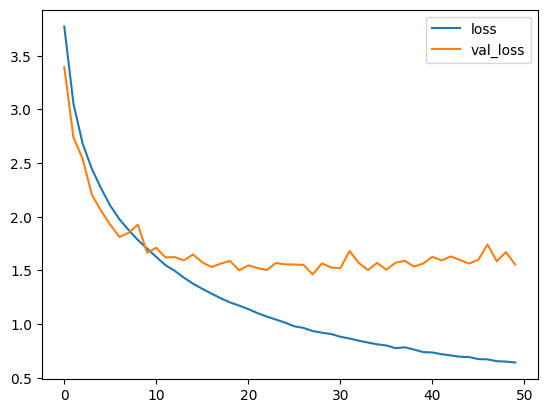

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

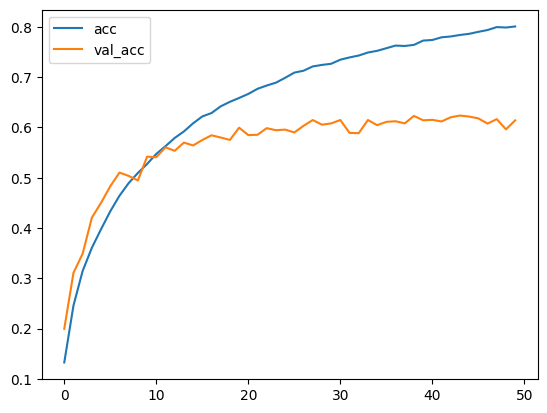

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[77  0  1 ...  0  1  0]
 [ 0 73  0 ...  0  0  0]
 [ 0  2 36 ...  1  3  0]
 ...
 [ 0  1  0 ... 67  0  0]
 [ 0  0  3 ...  0 33  1]
 [ 0  0  0 ...  0  0 73]]


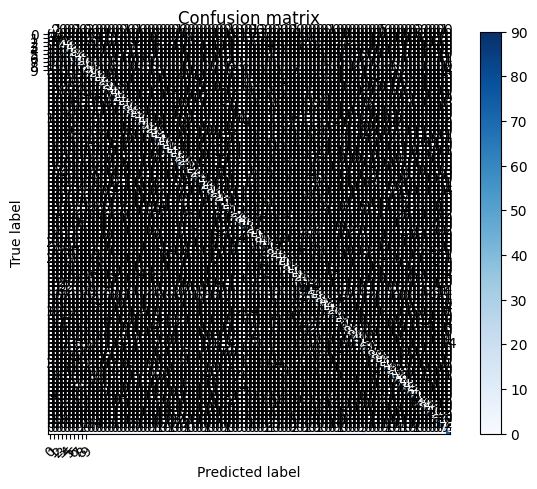

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [10]:
labels = '''
beaver, dolphin, otter, seal, whale, 
aquarium fish, flatfish, ray, shark, trout,
orchids, poppies, roses, sunflowers, tulips,
bottles, bowls, cans, cups, plates,
apples, mushrooms, oranges, pears, sweet peppers,
clock, computer keyboard, lamp, telephone, television,
bed, chair, couch, table, wardrobe,
bee, beetle, butterfly, caterpillar, cockroach,
bear, leopard, lion, tiger, wolf,
bridge, castle, house, road, skyscraper,
cloud, forest, mountain, plain, sea,
camel, cattle, chimpanzee, elephant, kangaroo,
fox, porcupine, possum, raccoon, skunk,
crab, lobster, snail, spider, worm,
baby, boy, girl, man, woman,
crocodile, dinosaur, lizard, snake, turtle,
hamster, mouse, rabbit, shrew, squirrel,
maple tree, oak tree, palm tree, pine tree, willow tree,
bicycle, bus, motorcycle, pickup truck, train,
lawn mower, rocket, streetcar, tank, tractor
'''.split()


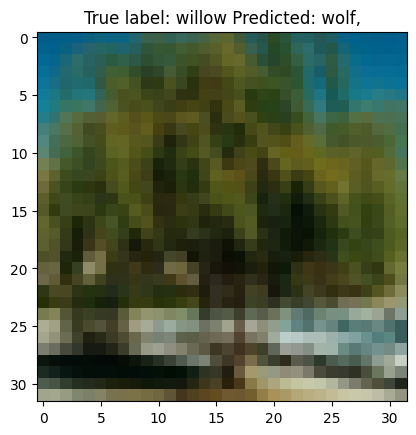

In [11]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     